<a href="https://colab.research.google.com/github/Kamal-Moha/Neural-Nexus---Refactory/blob/main/Edith_sea_turtle_YOLOv8_0_9334_LB_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import cv2

In [2]:
%pip install -qq ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [3]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 6.23M/6.23M [00:00<00:00, 192MB/s]
Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 165k/165k [00:00<00:00, 15.8MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 77.8ms
Speed: 14.5ms preprocess, 77.8ms inference, 667.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [4]:
from ultralytics import YOLO

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
model = YOLO('/content/yolov8n.pt')
results = model.predict('https://ultralytics.com/images/zidane.jpg')

# Extract bounding boxes, classes, names, and confidences
# boxes = results[0].boxes.xyxy.tolist()
boxes = results[0].boxes.xywhn.tolist()[0]
classes = results[0].boxes.cls.tolist()
names = results[0].names
confidences = results[0].boxes.conf.tolist()

print(boxes)
xmin = min(boxes[::2])
xmax = max(boxes[::2])
ymin = min(boxes[1::2])
ymax = max(boxes[1::2])
print('--------')
print(xmin, ymin, xmax-xmin, ymax-ymin)
print('-------')
print(classes)
print(names)
print(confidences)
# # Iterate through the results
# for box, cls, conf in zip(boxes, classes, confidences):
#     x1, y1, x2, y2 = box
#     confidence = conf
#     detected_class = cls
#     name = names[int(cls)]


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 183.7ms
Speed: 3.9ms preprocess, 183.7ms inference, 983.8ms postprocess per image at shape (1, 3, 384, 640)
[0.4820365905761719, 0.6303429007530212, 0.7711796164512634, 0.7129523754119873]
--------
0.4820365905761719 0.6303429007530212 0.28914302587509155 0.08260947465896606
-------
[0.0, 0.0, 27.0]
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis 

**Create Dataset**

In [7]:
!unzip -qq '/content/drive/MyDrive/Capstone/IMAGES_1024.zip'

In [8]:
!unzip -qq '/content/drive/MyDrive/Capstone/IMAGES_512.zip'

In [9]:
train = pd.read_csv('/content/drive/MyDrive/Capstone/Train.csv')
ss = pd.read_csv('/content/drive/MyDrive/Capstone/SampleSubmission.csv')

In [10]:
imgs_1024 = [i[:-4] for i in os.listdir('/content/IMAGES_1024')]
imgs_512 = [i[:-4] for i in os.listdir('/content/IMAGES_512')]
vals = [i in imgs_512 for i in imgs_1024]
all(vals)

True

In [11]:
len(imgs_512), len(imgs_1024)

(2023, 2021)

In [12]:
train.head()

,Image_ID,x,y,w,h
0,04FB1B33,0.481988,0.506076,0.174696,0.405671
1,B04E481E,0.617405,0.313368,0.177734,0.293113
2,32655645,0.490885,0.465856,0.165582,0.357350
3,44D4DA7C,0.472873,0.506076,0.237847,0.409722
4,4F36EF72,0.433811,0.574363,0.180773,0.397569


In [13]:
im = cv2.imread('/content/IMAGES_1024/04FB1B33.JPG')
img_h, img_w, _ = im.shape


In [14]:
img_w, img_h

(1024, 768)

In [15]:
ss[ss['Image_ID'] == '4863D911']

,Image_ID,x,y,w,h
0,4863D911,0.16,0.25,0.61,0.61


In [16]:
train['id'] = 0
train['class'] = 'turtle_face' #2.0

def coco_to_yolo(x1, y1, w, h, image_w, image_h):
    # return [((2*x1 + w)/(2*image_w)) , ((2*y1 + h)/(2*image_h)), w/image_w, h/image_h]
    return [(2*x1 + w)/2 , (2*y1 + h)/2, w, h]

train['yolo'] = train.apply(lambda row: coco_to_yolo(row['x'], row['y'], row['w'], row['h'], img_w, img_h), axis=1)

In [17]:
!mkdir Turtle_dataset
!mkdir Turtle_dataset/train  Turtle_dataset/train/images Turtle_dataset/train/labels
!mkdir Turtle_dataset/val Turtle_dataset/val/images Turtle_dataset/val/labels
!mkdir Turtle_dataset/test Turtle_dataset/test/images Turtle_dataset/test/labels

In [18]:
%%time
import shutil, random

train_files = random.sample(train['Image_ID'].values.tolist(), 1193) # random sample
val_files = random.sample([i for i in train['Image_ID'].values.tolist() if i not in train_files], 120)
test_files = [i for i in train['Image_ID'].values.tolist() if i not in train_files and i not in val_files]

for f in train_files:
  shutil.copyfile(f'/content/IMAGES_1024/{f}.JPG', f'/content/Turtle_dataset/train/images/{f}.JPG')

for f in val_files:
    shutil.copyfile(f'/content/IMAGES_1024/{f}.JPG', f'/content/Turtle_dataset/val/images/{f}.JPG')

for f in test_files:
    shutil.copyfile(f'/content/IMAGES_1024/{f}.JPG', f'/content/Turtle_dataset/test/images/{f}.JPG')

CPU times: user 74.3 ms, sys: 420 ms, total: 494 ms
Wall time: 627 ms


In [19]:
train.head()

,Image_ID,x,y,w,h,id,class,yolo
0,04FB1B33,0.481988,0.506076,0.174696,0.405671,0,turtle_face,"[0.5693359375, 0.708912037037037, 0.1746961805..."
1,B04E481E,0.617405,0.313368,0.177734,0.293113,0,turtle_face,"[0.7062717013888888, 0.4599247685185185, 0.177..."
2,32655645,0.490885,0.465856,0.165582,0.357350,0,turtle_face,"[0.5736762152777778, 0.64453125, 0.16558159722..."
3,44D4DA7C,0.472873,0.506076,0.237847,0.409722,0,turtle_face,"[0.591796875, 0.7109375, 0.2378472222222222, 0..."
4,4F36EF72,0.433811,0.574363,0.180773,0.397569,0,turtle_face,"[0.524197048611111, 0.7731481481481481, 0.1807..."


In [20]:
from pathlib import Path

def create_yolo_labels(image_path, df, labels_path):
  for i in os.listdir(image_path):
    annotations = df[df['Image_ID'] == i[:-4]]
    filename = f'{labels_path}/{i[:-4]}.txt'
    with open(filename, 'w') as f:
      for _, row in annotations.iterrows():
        xc, yc, x, y = row['yolo'][0], row['yolo'][1], row['yolo'][2], row['yolo'][3]
        class_id = 0 #row['id']
        f.write(f"{class_id} {xc} {yc} {x} {y}\n")

for k in ['train', 'val', 'test']:
  create_yolo_labels(f'/content/Turtle_dataset/{k}/images', train, f'/content/Turtle_dataset/{k}/labels')


In [21]:
import yaml
labels = ['turtle_face']

yaml_dict = {
    'path': '/content/Turtle_dataset',
    'train': 'train/images',
    'val': 'val/images',
    'names': labels,
    'nc': 1
}

with open('/content/Turtle_dataset/data.yaml', 'w+') as yml_file:
    yaml.dump(yaml_dict, yml_file)

**Custom Training**

In [23]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Turtle_dataset/data.yaml epochs=100 imgsz=800 plots=True

Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Turtle_dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

**Examine**

In [24]:
!ls /content/runs/detect/train2

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1718009401.d409875f8b43.9510.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch6750.jpg  weights
P_curve.png					    train_batch6751.jpg
PR_curve.png					    train_batch6752.jpg


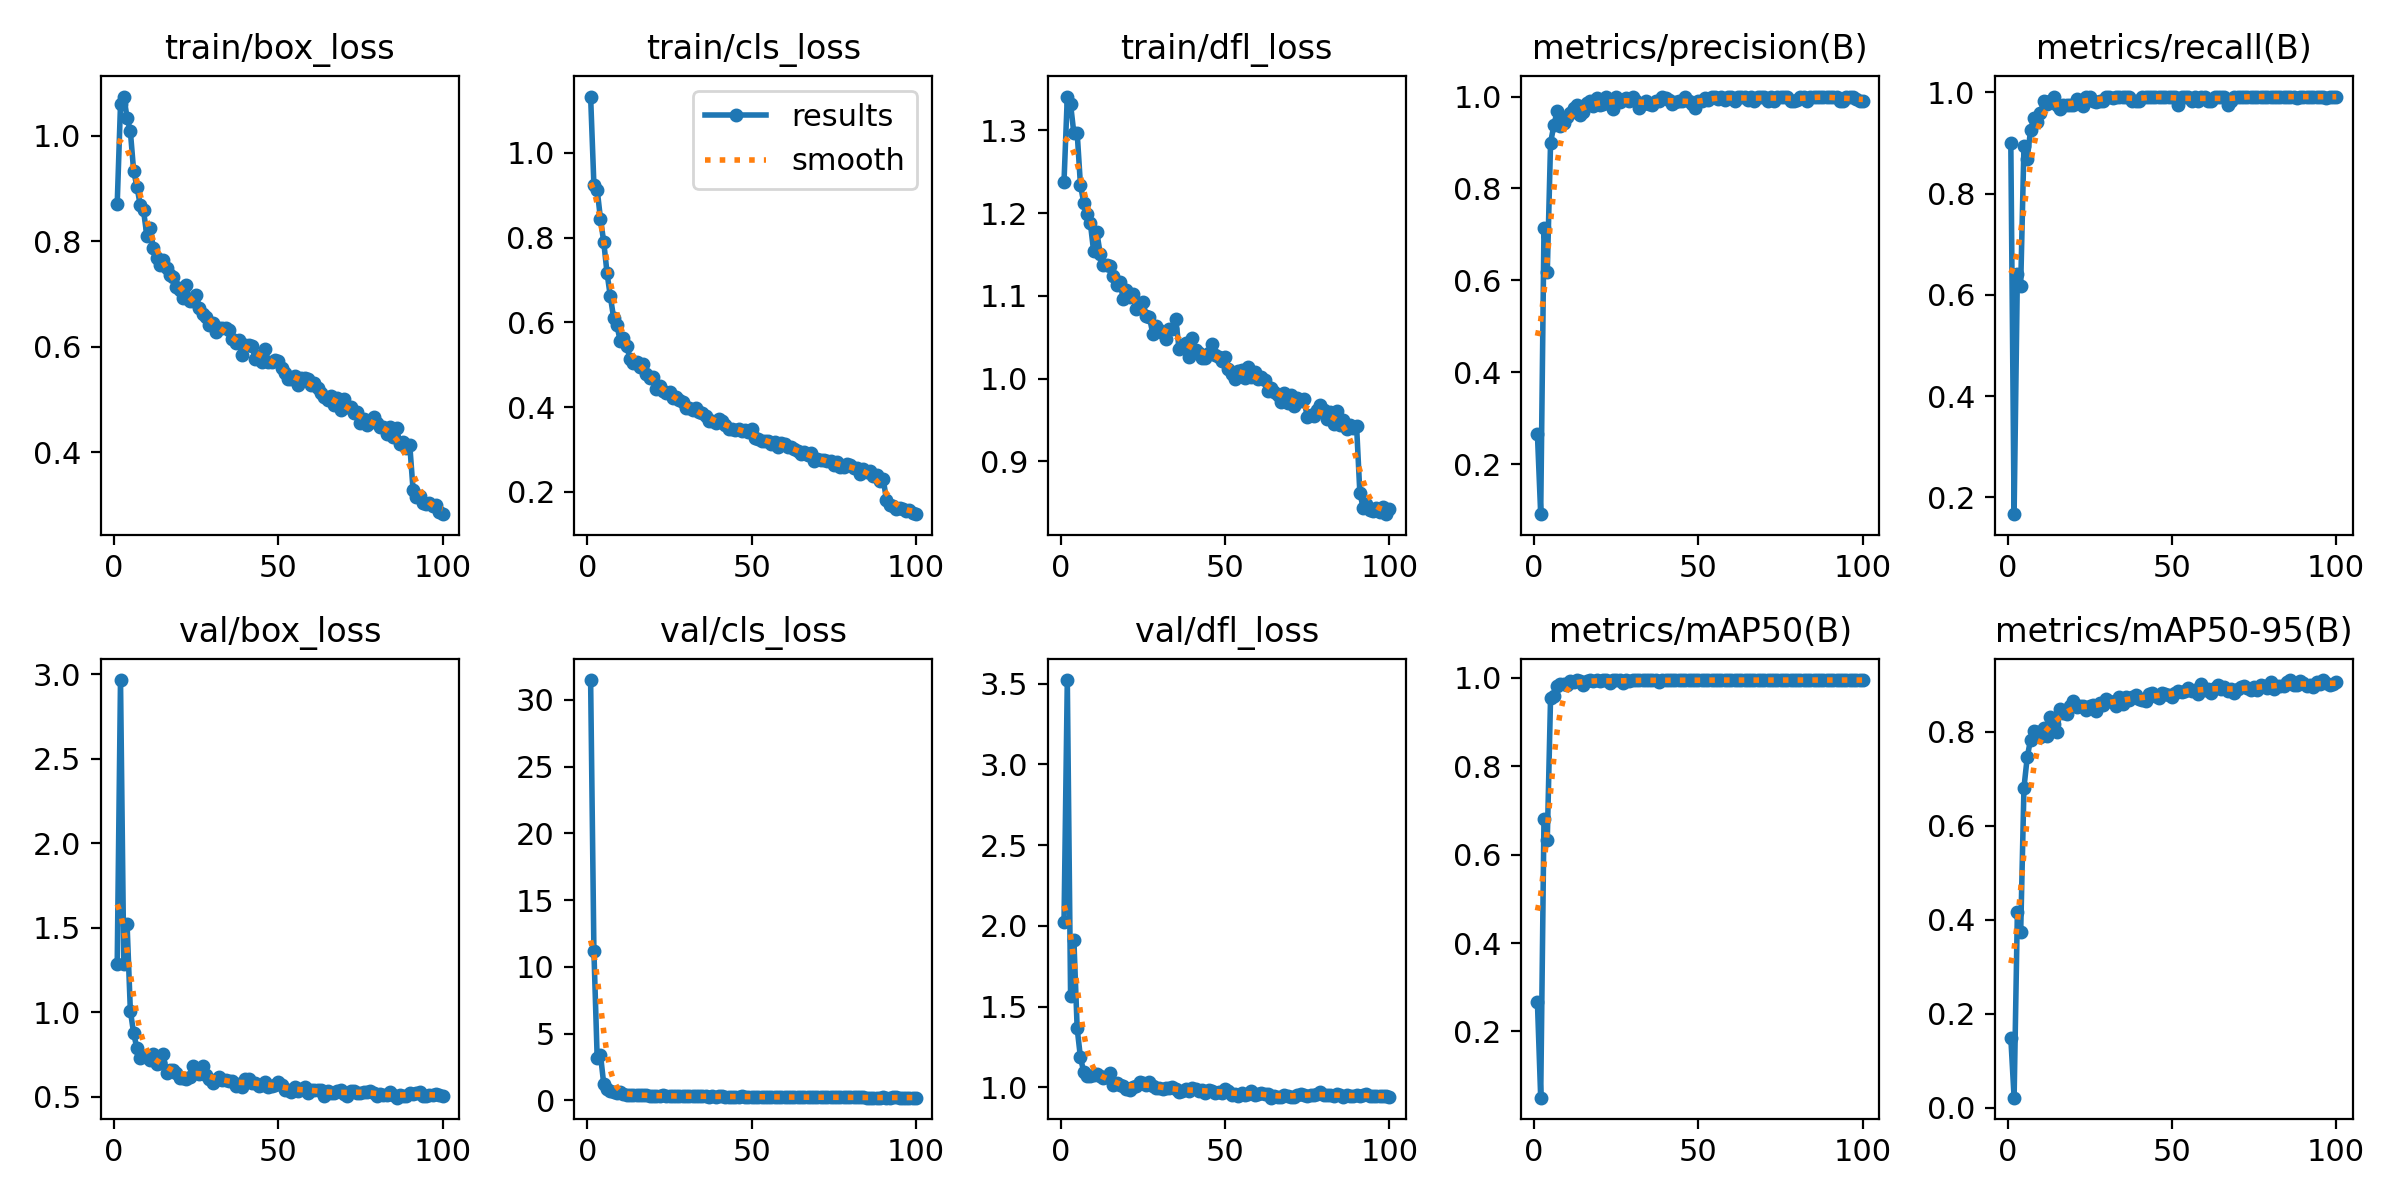

In [25]:
from IPython.display import Image

Image(filename=f"/content/runs/detect/train2/results.png", width=1000)

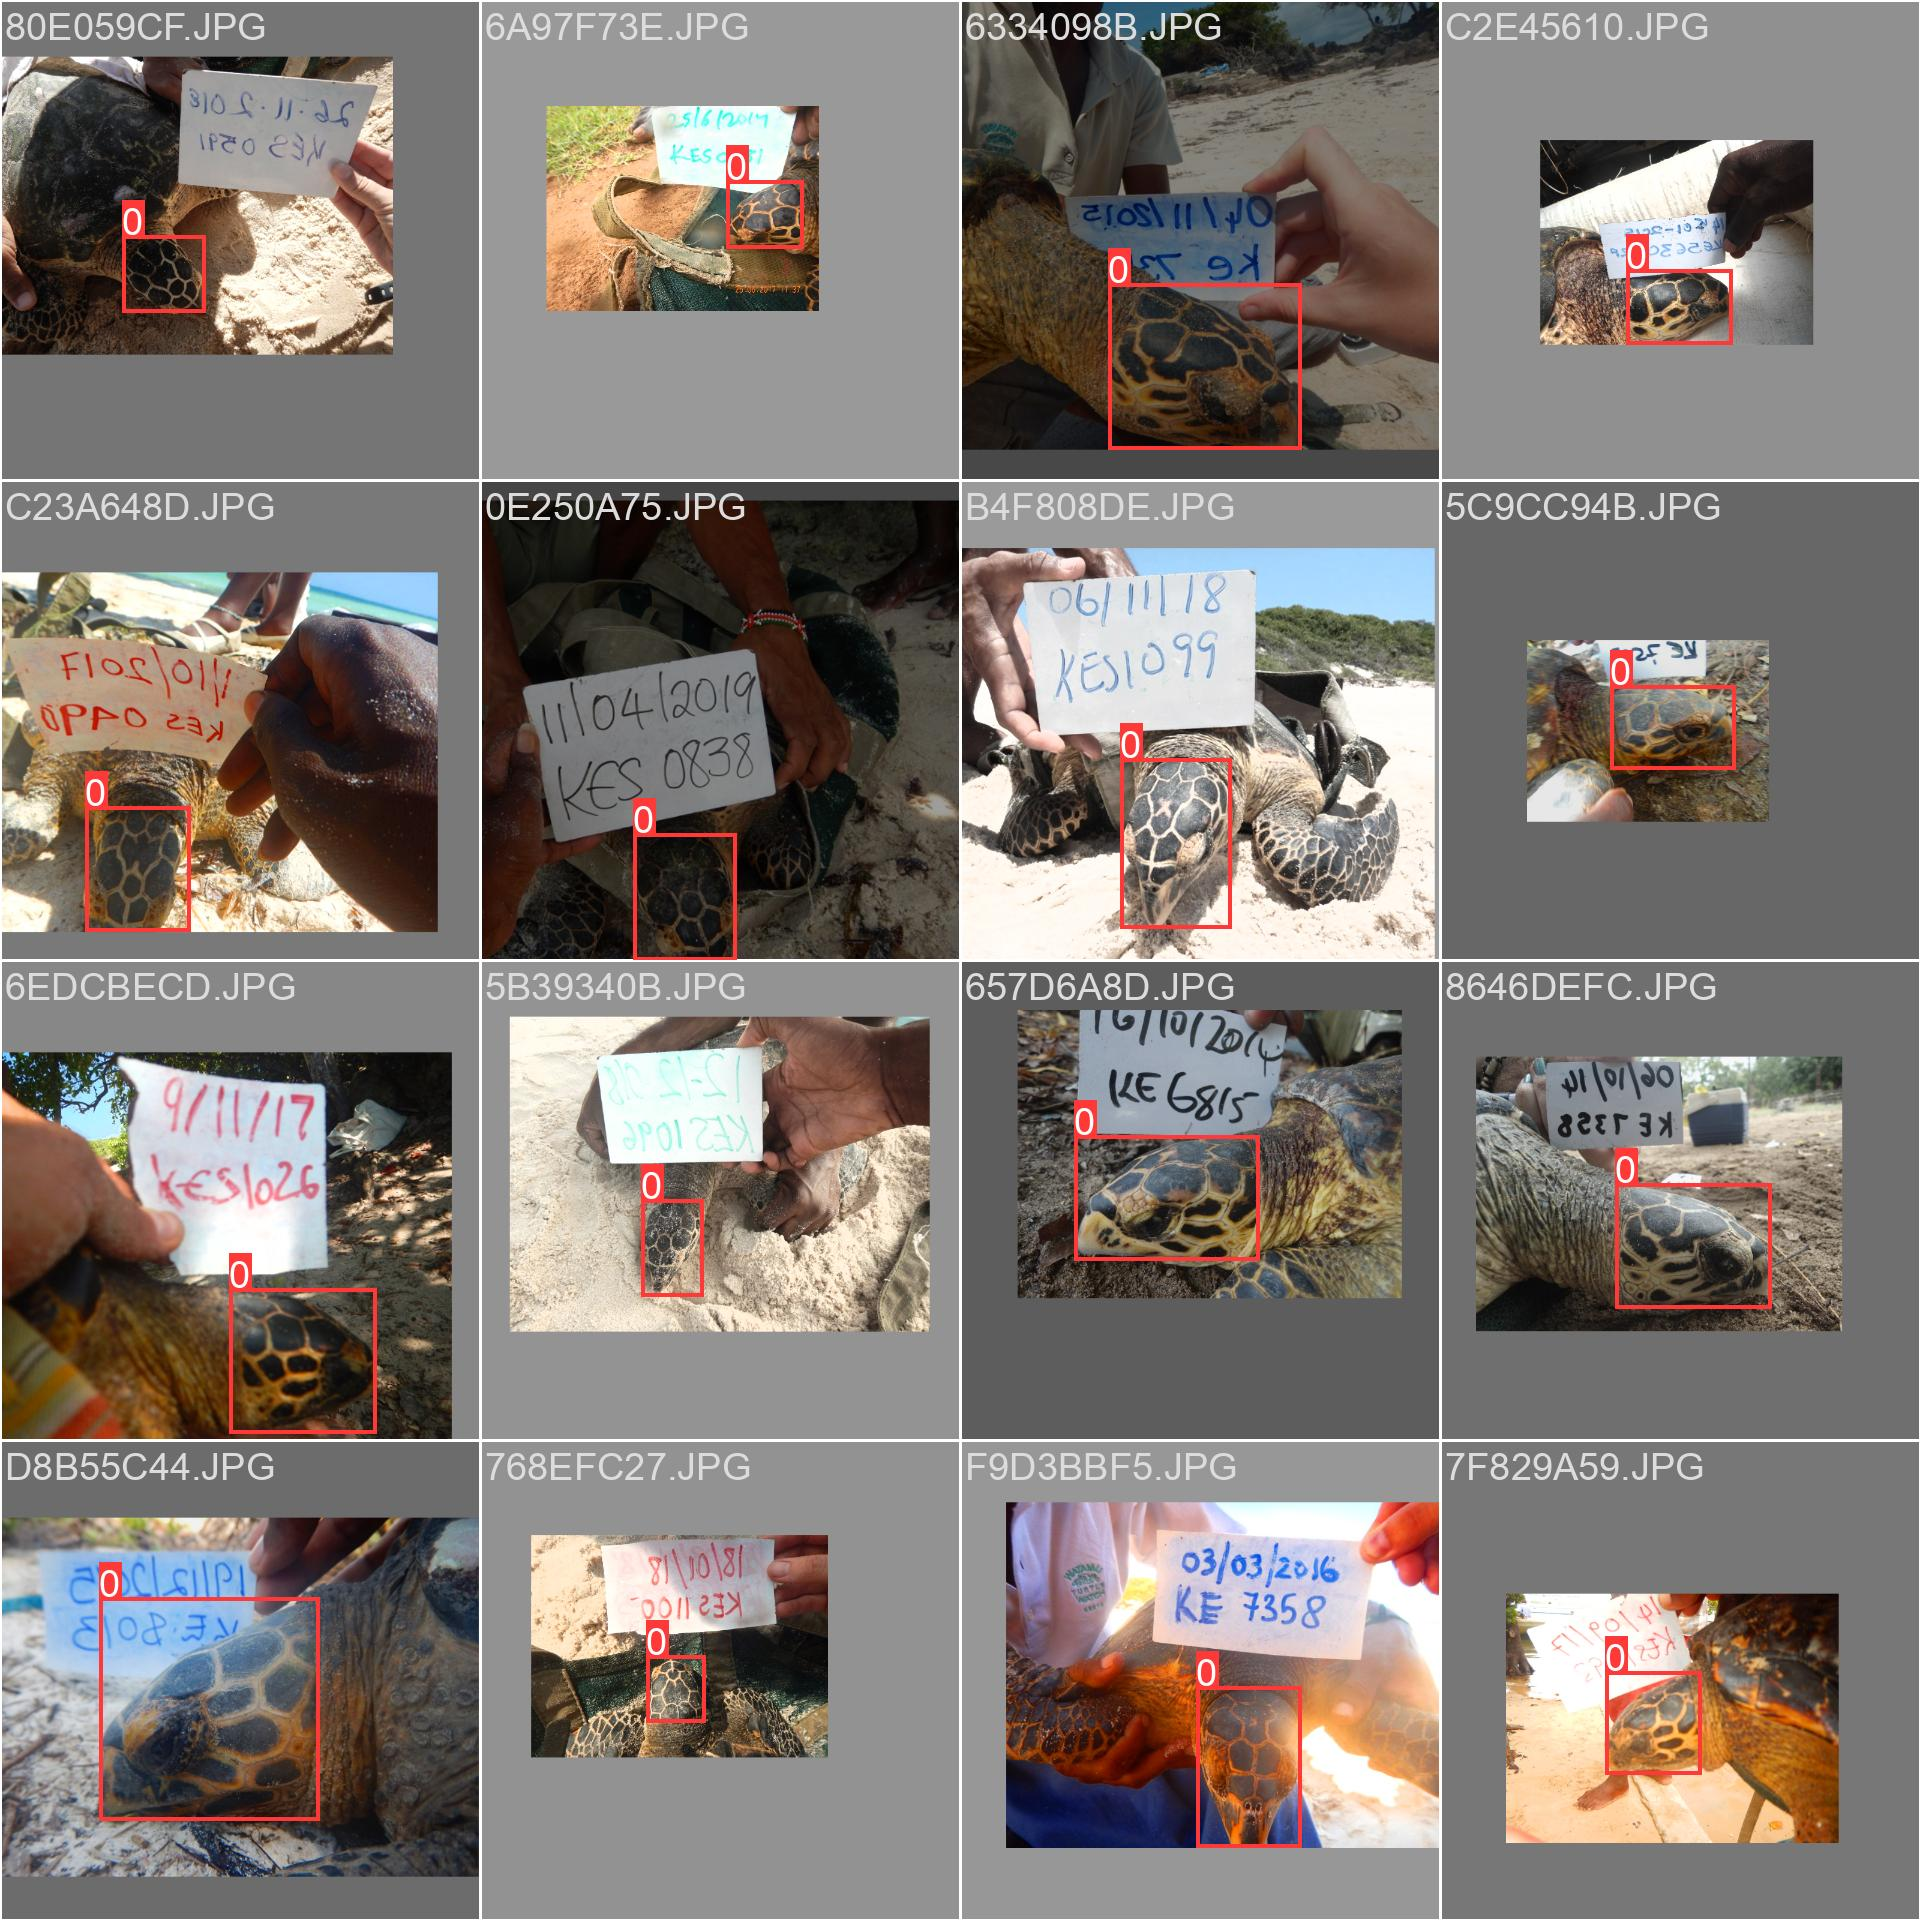

In [26]:
Image(filename=f"/content/runs/detect/train2/train_batch6750.jpg", width=1000)

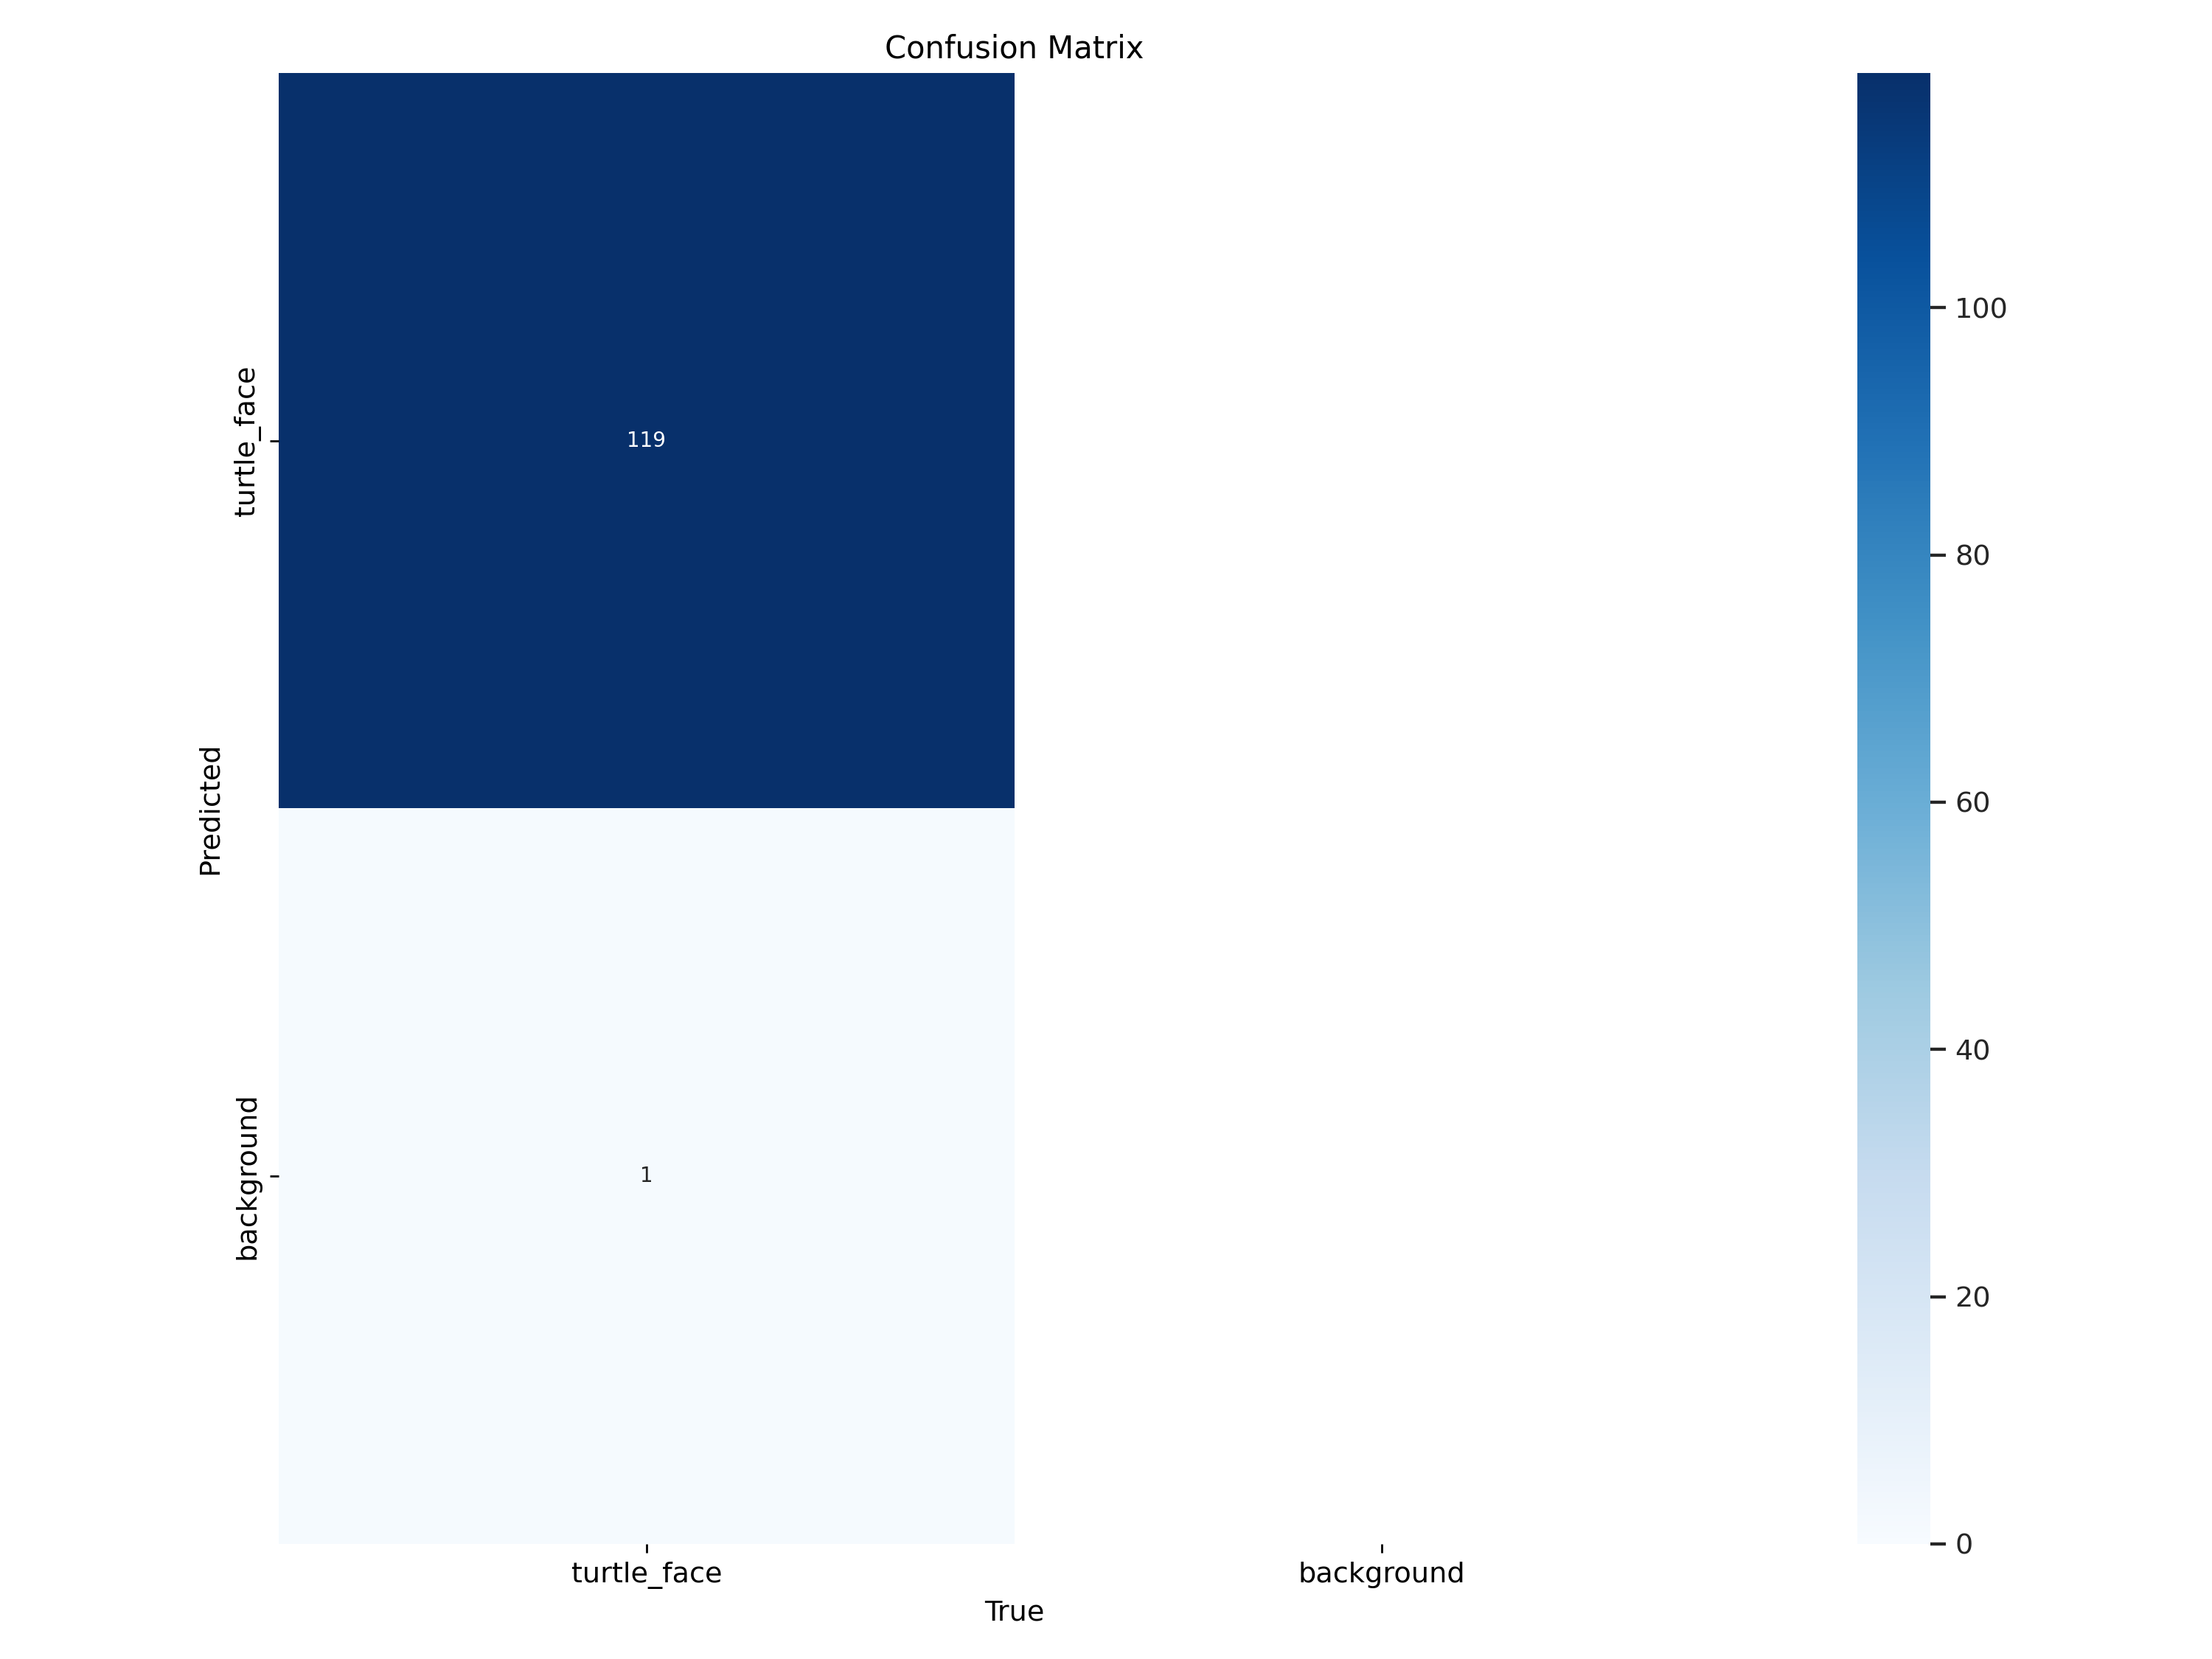

In [27]:
Image(filename=f"/content/runs/detect/train2/confusion_matrix.png", width=1000)

**Validate Custom Model**

In [28]:
%%time
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/Turtle_dataset/data.yaml

Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Turtle_dataset/val/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100% 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.46it/s]
                   all        120        120          1      0.992      0.995      0.911
Speed: 3.3ms preprocess, 24.7ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val
CPU times: user 146 ms, sys: 30.5 ms, total: 176 ms
Wall time: 21.2 s


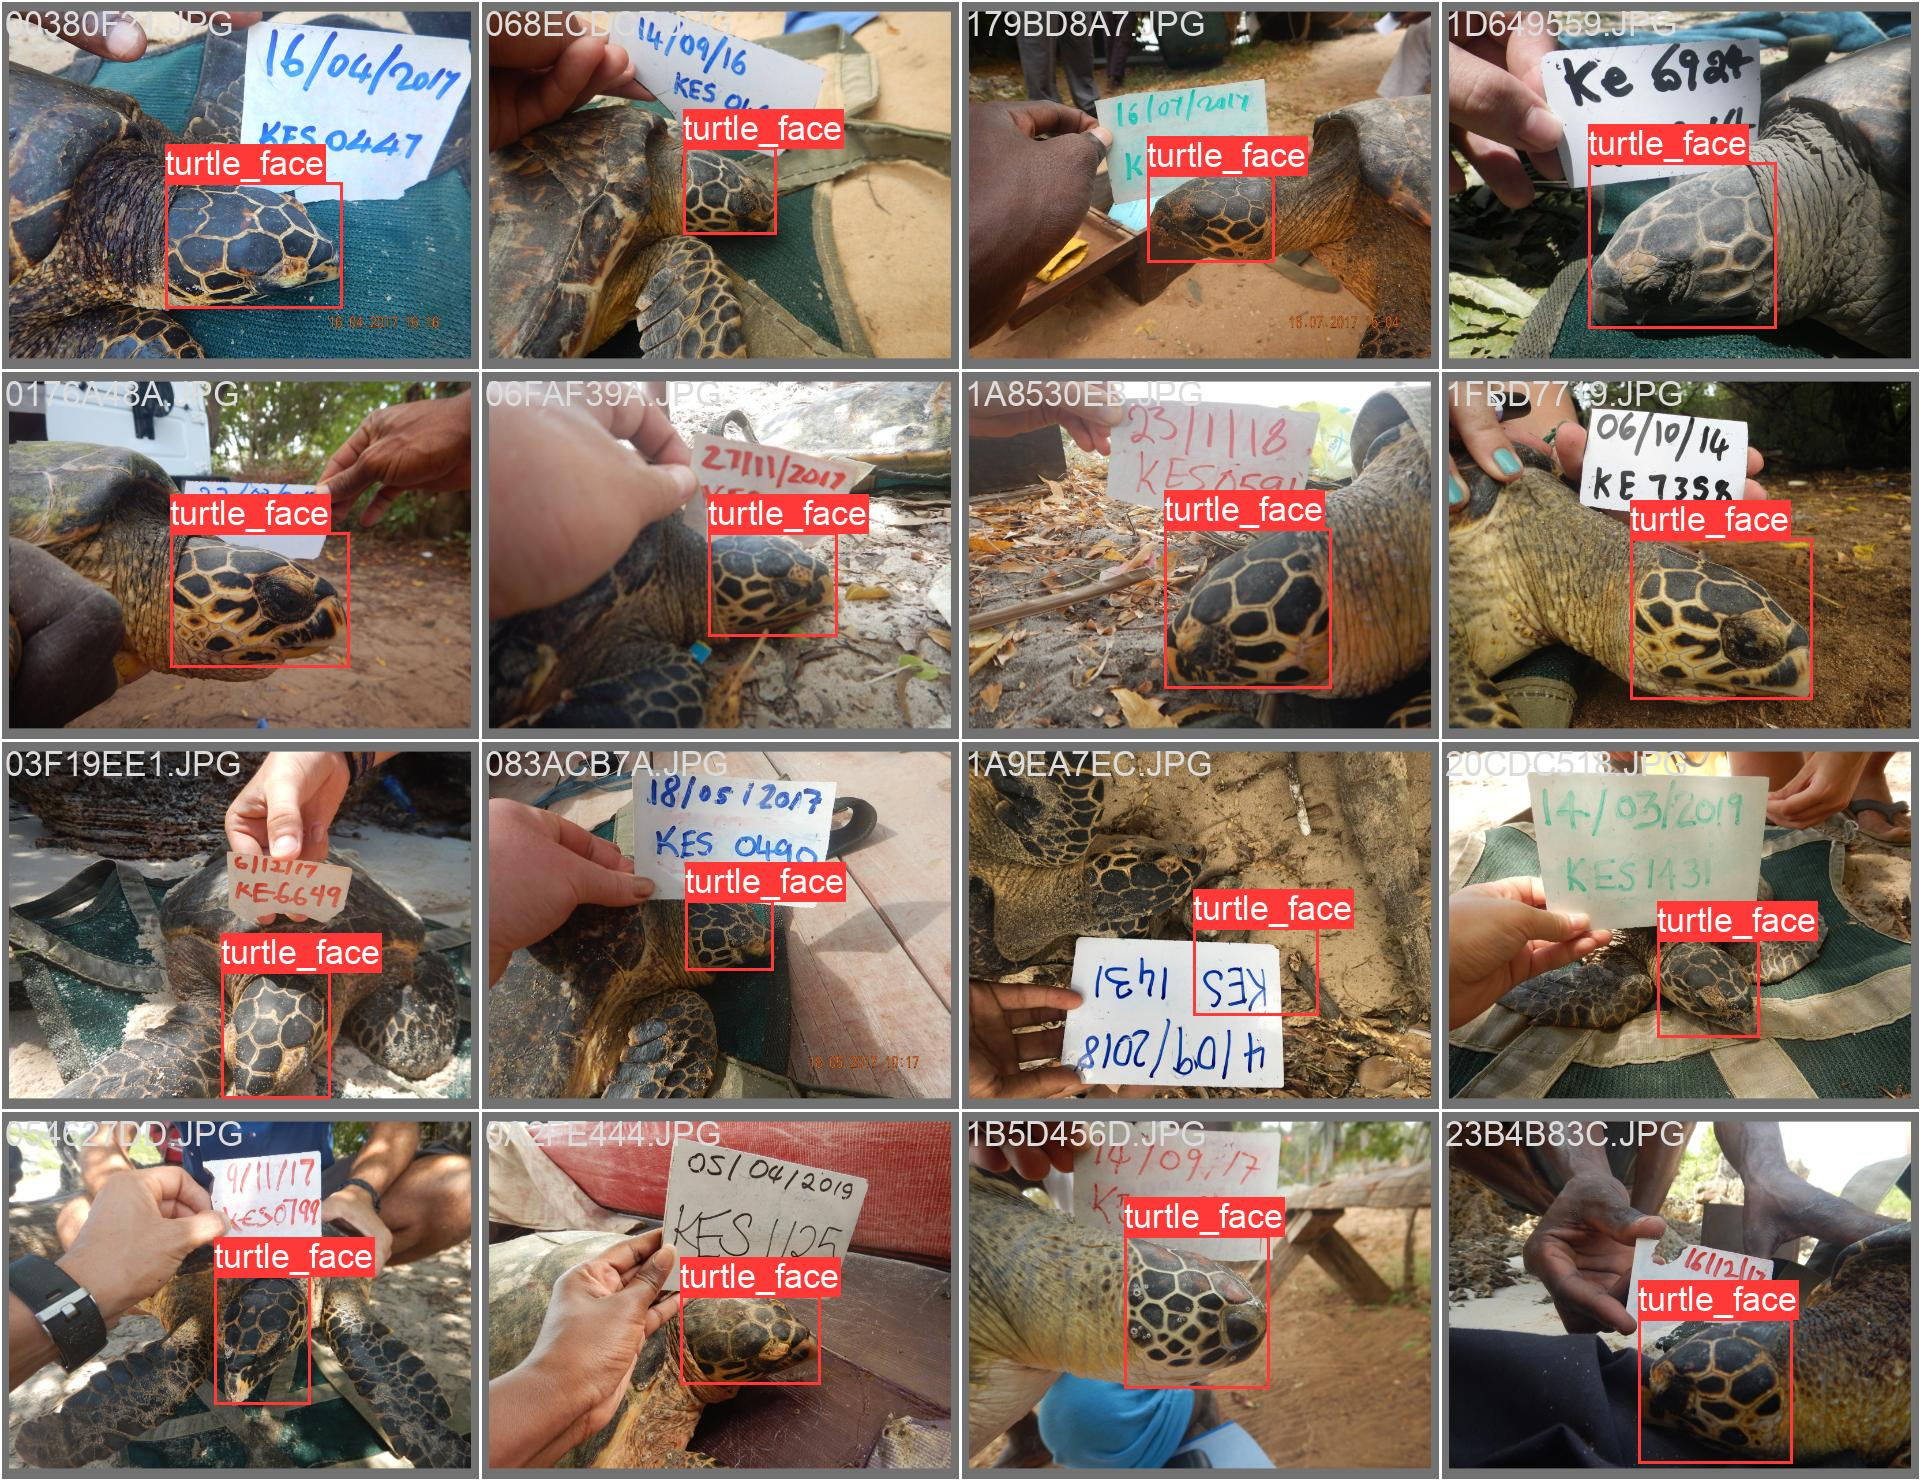

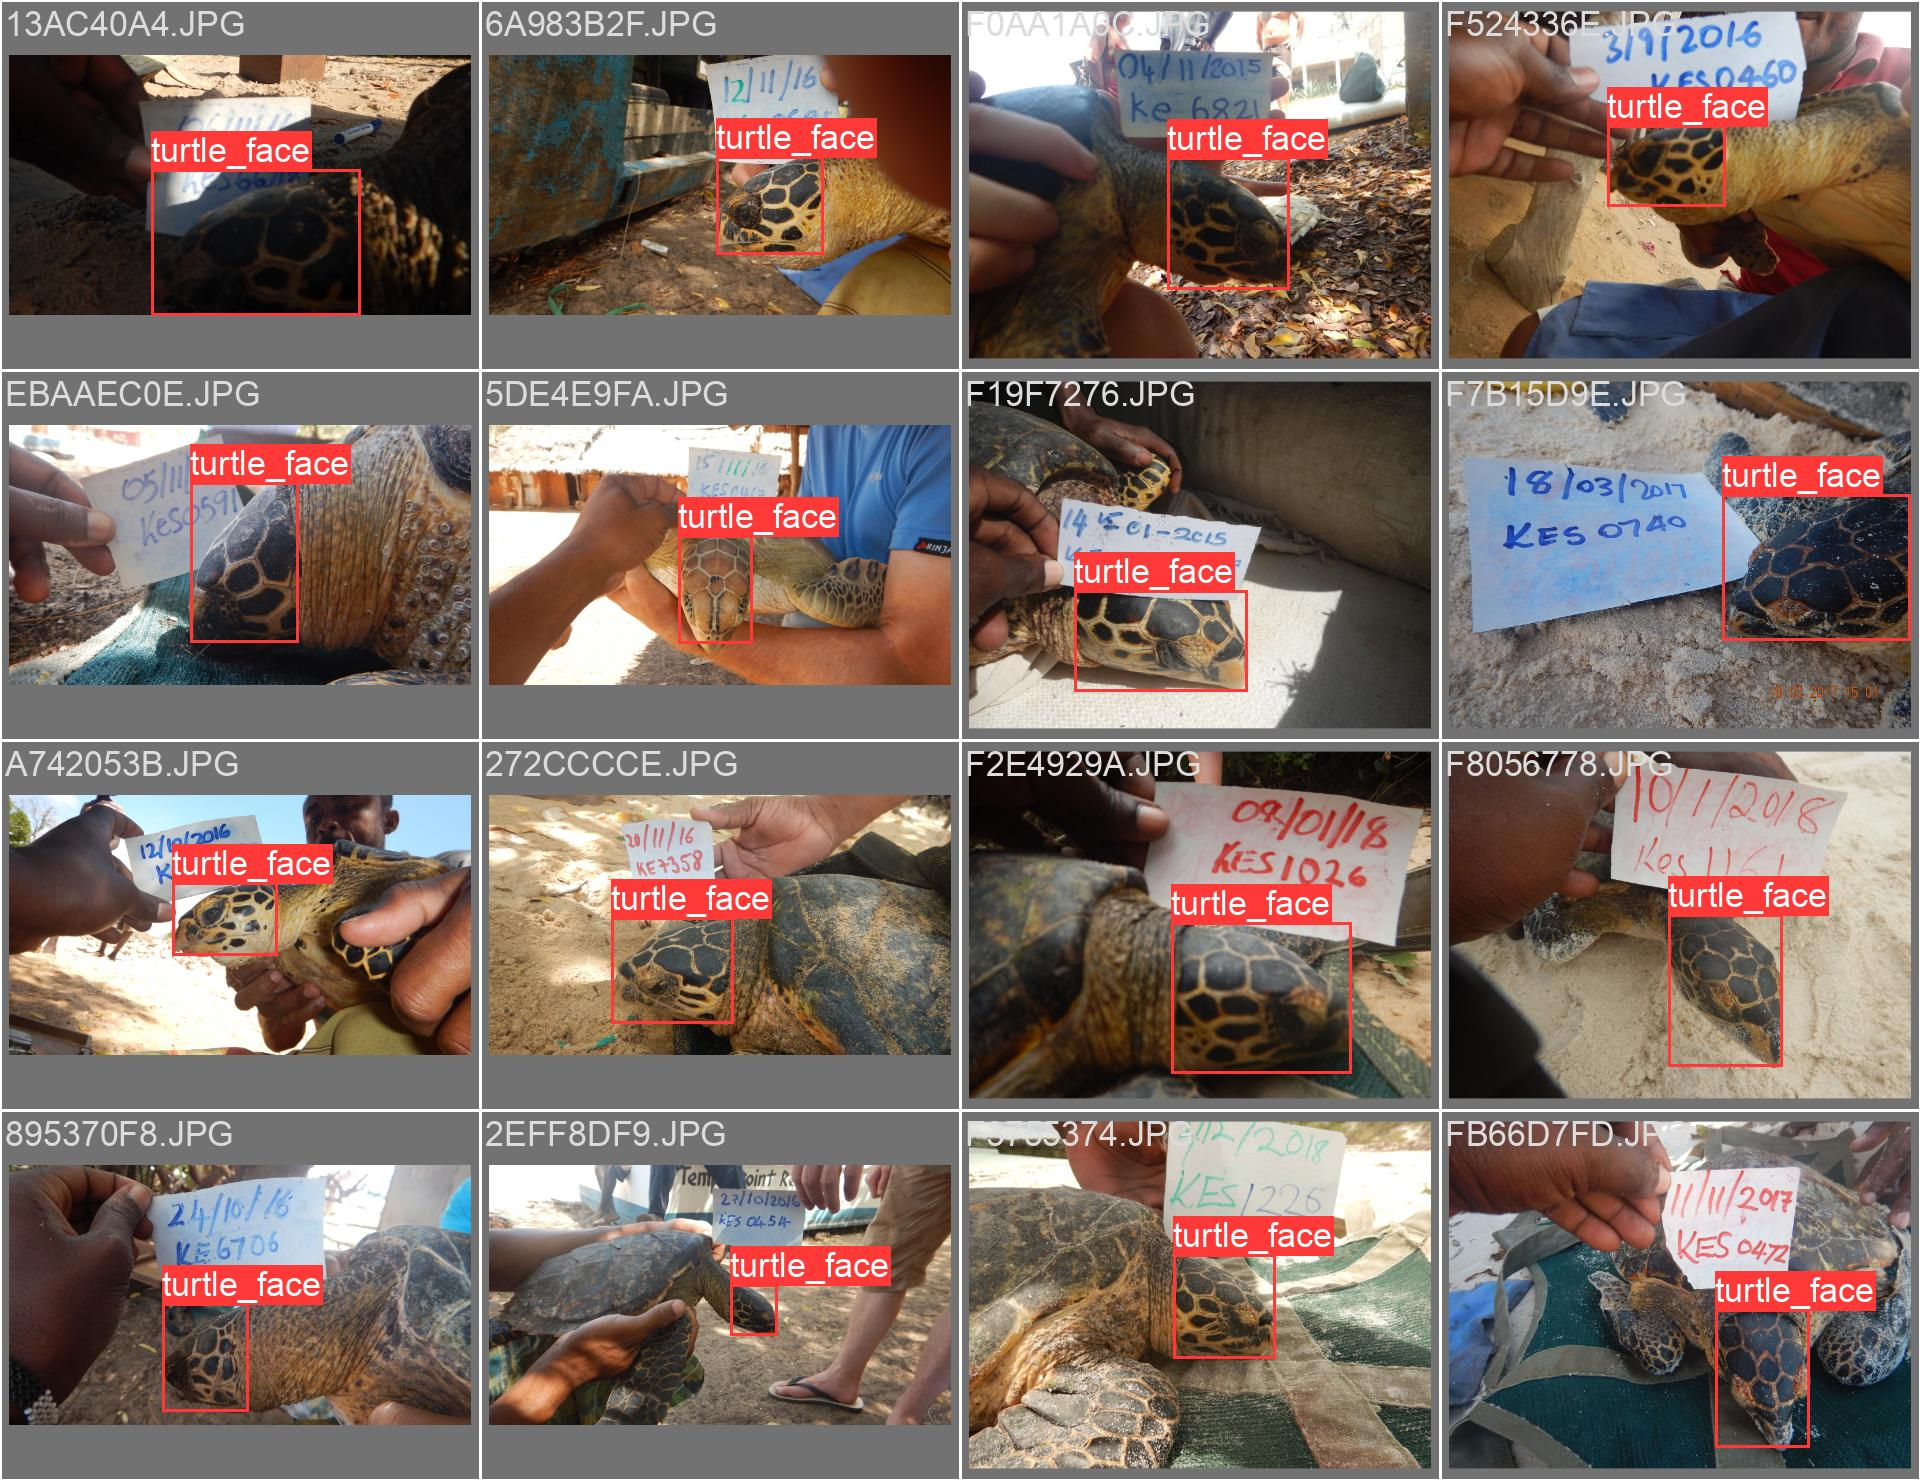

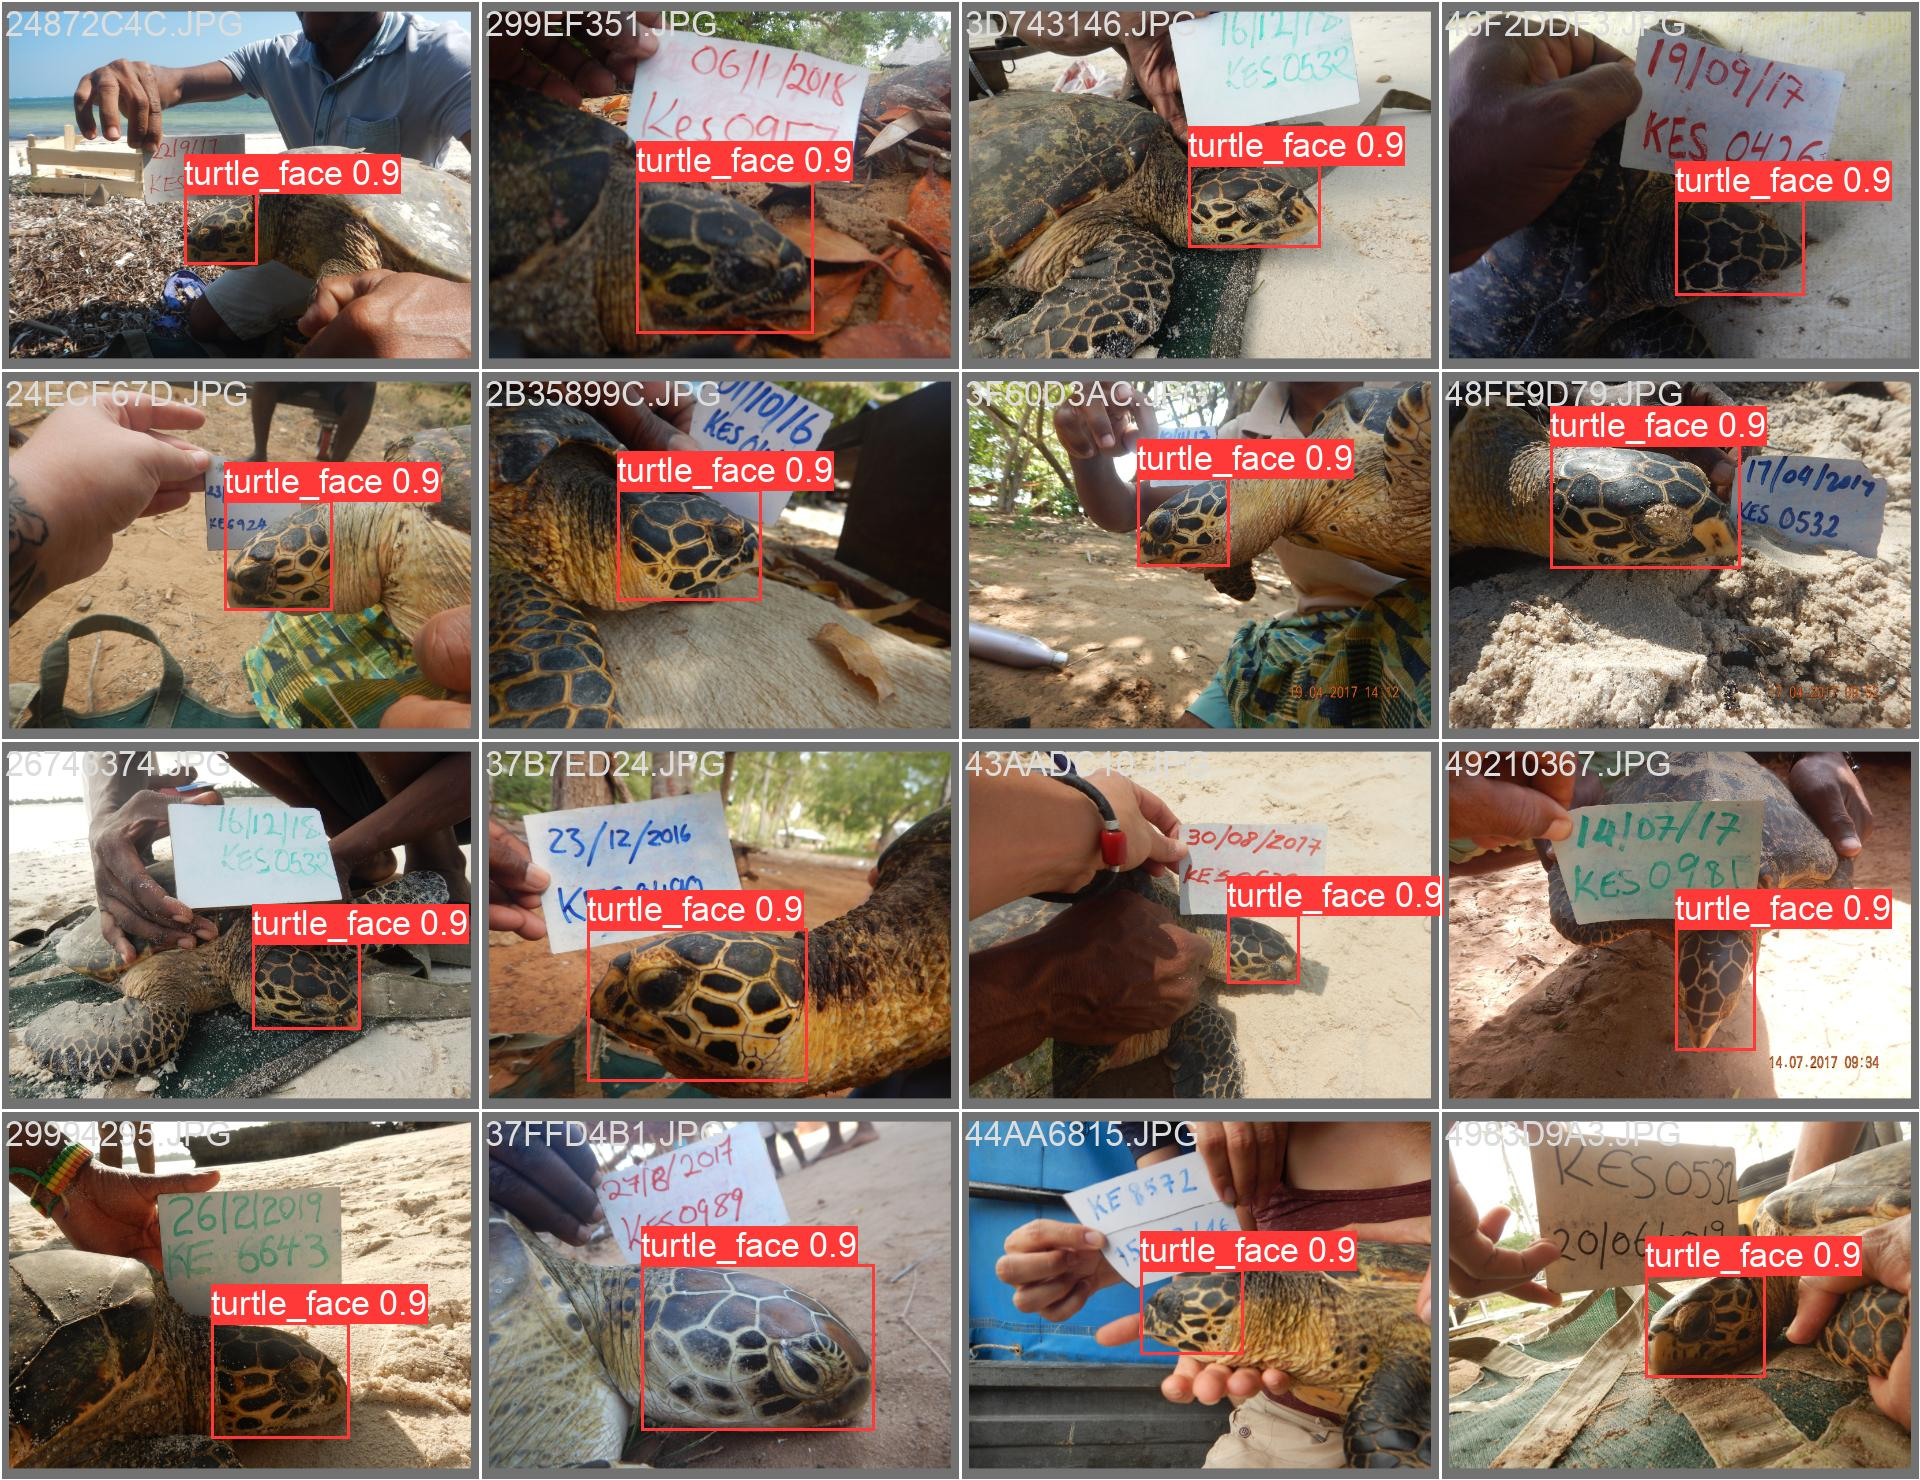

In [29]:
import glob
from IPython.display import Image, display
# val_batch1_pred.jpg
for image_path in glob.glob(f'/content/runs/detect/val/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [30]:
img_w, img_h

(1024, 768)

**Submitting**

In [31]:
sub_df = ss.copy()

In [32]:
sub_df.head()

,Image_ID,x,y,w,h
0,4863D911,0.16,0.25,0.61,0.61
1,6DD3ADD5,0.32,0.29,0.42,0.51
2,E8DC4D6A,0.34,0.52,0.48,0.48
3,E02ABB6C,0.33,0.51,0.44,0.46
4,875C19F4,0.37,0.41,0.44,0.48


In [37]:
%%time
# cols = ['Image_ID', 'x', 'y', 'w', 'h']
# dat = pd.DataFrame(columns=cols)

model = YOLO(f'/content/runs/detect/train2/weights/best.pt')

# new_data = []
for i, row in sub_df.iterrows():
    results = model.predict(f'/content/IMAGES_1024/{row["Image_ID"]}.JPG')
    # print(results[0].boxes)

    # Process results list
    for result in results[0]:
        xywhn = result.boxes.xywhn.cpu().numpy()[0]
        # print('----------------')
        xyxyn = result.boxes.xyxyn.cpu().numpy()[0]
        pred_boxes = [xyxyn[0], xyxyn[1], xywhn[2], xywhn[3]]
        print(pred_boxes)
        sub_df.at[i, 'x'] = pred_boxes[0]
        sub_df.at[i, 'y'] = pred_boxes[1]
        sub_df.at[i, 'w'] = pred_boxes[2]
        sub_df.at[i, 'h'] = pred_boxes[3]

# dat = pd.concat([dat, pd.DataFrame(new_data)], ignore_index=True)




image 1/1 /content/IMAGES_1024/4863D911.JPG: 608x800 1 turtle_face, 46.0ms
Speed: 11.2ms preprocess, 46.0ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)
[0.17802238, 0.3027073, 0.582701, 0.50112444]

image 1/1 /content/IMAGES_1024/6DD3ADD5.JPG: 608x800 1 turtle_face, 42.3ms
Speed: 8.6ms preprocess, 42.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)
[0.33583167, 0.3187387, 0.3643659, 0.4489963]

image 1/1 /content/IMAGES_1024/E8DC4D6A.JPG: 608x800 1 turtle_face, 41.2ms
Speed: 3.0ms preprocess, 41.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 800)
[0.3667426, 0.5368036, 0.43460464, 0.41839862]

image 1/1 /content/IMAGES_1024/E02ABB6C.JPG: 608x800 1 turtle_face, 41.2ms
Speed: 2.9ms preprocess, 41.2ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)
[0.33193305, 0.5408653, 0.41649207, 0.38217998]

image 1/1 /content/IMAGES_1024/875C19F4.JPG: 608x800 1 turtle_face, 32.4ms
Speed: 2.9ms preprocess, 32.4ms inference, 1

In [38]:
sub_df.head()

,Image_ID,x,y,w,h
0,4863D911,0.178022,0.302707,0.582701,0.501124
1,6DD3ADD5,0.335832,0.318739,0.364366,0.448996
2,E8DC4D6A,0.366743,0.536804,0.434605,0.418399
3,E02ABB6C,0.331933,0.540865,0.416492,0.382180
4,875C19F4,0.368886,0.469168,0.403183,0.408602


In [39]:
sub_df.isna().sum()

Image_ID    0
x           0
y           0
w           0
h           0
dtype: int64

In [40]:
sub_df.to_csv('yolo_comb.csv', index=False)

0